In [1]:
#imports numerical python stack
import numpy as np
np.__version__

'1.14.0'

In [2]:
#importing scikit-learn-image processing module
import skimage
skimage.__version__


'0.13.1'

In [3]:
#imports matplotlib sub-module of numpy
%matplotlib inline
import matplotlib.pyplot as pyplt

In [4]:
from skimage import data, color, io, img_as_float
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb

img = color.rgb2gray(io.imread('C:/Users/user/Desktop/ProjectWork/Holton_4cmpx_RGB_only/Holtonians.png'))
img= img_as_float(img)

In [5]:
from skimage.io import *
trees=np.asarray(io.imread('C:/Users/user/Desktop/ProjectWork/Holton_4cmpx_RGB_only/Holtonians.png', cmap='Gray'))

In [6]:
#imports data submodule from scikit-learn
from skimage import data
#imports image data already placed in skimage working folder

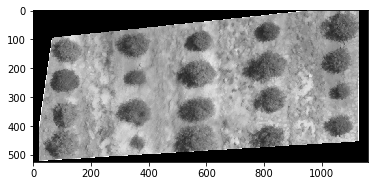

In [7]:
#The pyplot 'plot' function plots a heatmap showing the intensities of the Grayscale imagery
#imagery is converted into Grayscale, Scikit-learn can only work on images as 2D arrays (grayscale imagery)
#Coloured images are 3D Arrays in Scikit learn
pyplt.imshow(img, cmap='gray');

In [8]:
#from the pylab module of python everything is imported
from pylab import *

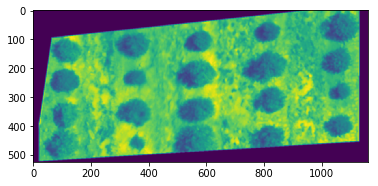

In [9]:
from scipy.ndimage import gaussian_filter
img = gaussian_filter(img, 1.8)
imshow(img)


C:\Users\user\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


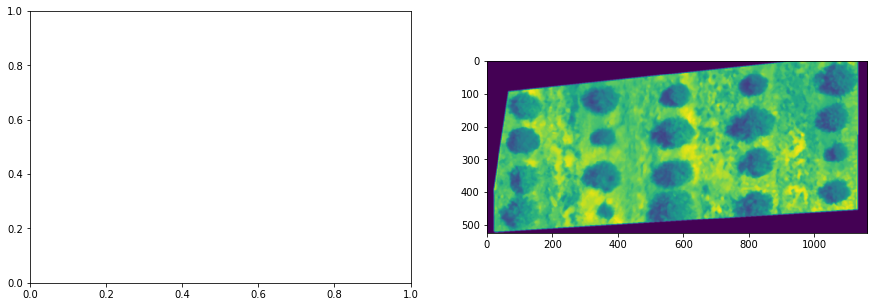

In [10]:
#The Filters submodule is imported
#The imagery is then denoised using a median filter with 5x5 kernel/ structuring element
#Pyplot shows the imagery as before and after filtering
from skimage import filters
trees_denoised=img_as_float(filters.median(img, selem=np.ones((5, 5))))
f, (axo, ax1)=pyplt.subplots(1, 2, figsize=(15,5))
ax0=imshow(img)
ax1=imshow(trees_denoised);


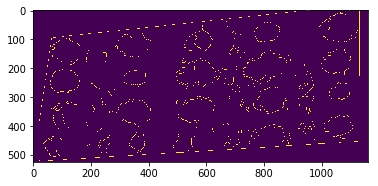

In [11]:
#The 'feature' submodule is imported
#The canny edge detector from 'feature' is used to detect the edges of the trees
#the result is shown, sigma adjusts the sensitivity of the the canny filter
from skimage import feature
edges = skimage.feature.canny(img, sigma=2)

plt.imshow(edges);

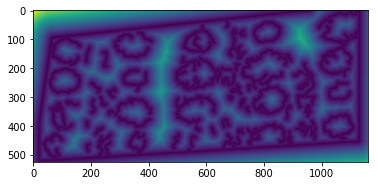

In [12]:
#Numpy is part of the SciPy ecosystem, hence 'ndimage' can be called here as it is inherited by Numpy
#'edt' is the euclidean distance transform, it is applied on the negative of the edges
#that has the effect of flipping the background to the foreground and vice-versa
#the distance transform is the distance to the nearest background pixel
from scipy.ndimage import distance_transform_edt
dt=distance_transform_edt(~edges)
plt.imshow(dt)

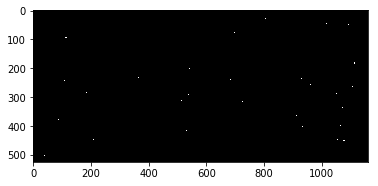

In [13]:
#peak_local_max finds the local peaks each of the regions
local_max=feature.peak_local_max(dt, indices=False, min_distance=5)
pyplt.imshow(local_max, cmap='gray')

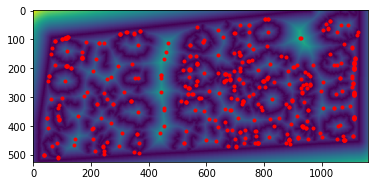

In [14]:
#the peaks/nodes are the origins of the watersheds
peak_idx=feature.peak_local_max(dt, indices=True, min_distance=5)
pyplt.plot(peak_idx[:,1], peak_idx[:,0], 'r.')
pyplt.imshow(dt);

In [15]:
#this labels each of the nodes and its surrounding region
from skimage import measure
markers=measure.label(local_max)

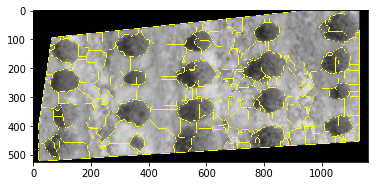

In [16]:
#this calls the morphology and watershed sub-modules
#the watershed function is called on the inverse of the distance-transformed map
#this has the effect of making crests into troughs, 
#the watershed then fills from the center of the coin
#mark boundaries is used to generate line boundaries around each of the regions
from skimage import morphology, segmentation
labels=morphology.watershed(-dt, markers)
plt.imshow(segmentation.mark_boundaries(img,labels));

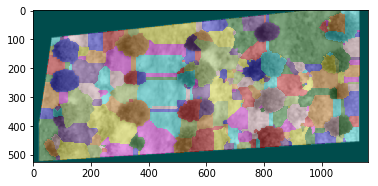

In [17]:
#rgb visualization can also be used on the imagery for a different perspective
from skimage import color
plt.imshow(color.label2rgb(labels, image=img))

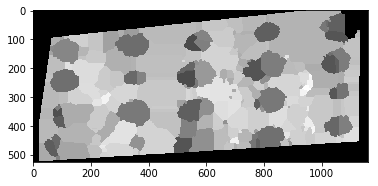

In [18]:
#to merge said regions we call label2rgb we use it to show the average pixel value
plt.imshow(color.label2rgb(labels, image=img, kind='avg'), cmap='gray');

In [19]:
#as the foreground is lighter than the background we can split
#the background from the foreground based off of the intensities
#each object becomes a region whose properties we can calculate and store in alist
regions=measure.regionprops(labels, intensity_image=img)

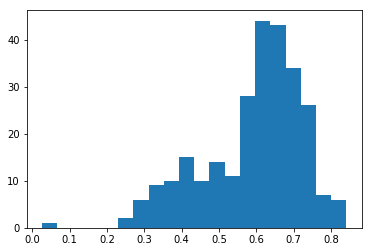

In [20]:
#the mean intensity for each region is calculated
region_means=[r.mean_intensity for r in regions]
plt.hist(region_means, bins=20);
#the histogram for each class is shown, this completes the classification

In [21]:
#The cluster module of sci-kit learn is imported, and the number of clusters is input
from sklearn.cluster import *
model=KMeans(n_clusters=2)

region_means=np.array(region_means).reshape(-1,1)

In [22]:
#this fits the model to the means 
#and prints the location of centroid for each region
model.fit(region_means)
print(model.cluster_centers_)

[[0.66140295]
 [0.40648585]]


In [23]:
#the model then predicts the label for each of the nodes
bg_fg_labels=model.predict(region_means)
bg_fg_labels

array([0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1])

In [24]:
#the image must be labelled appropriately
#The original label is copied
#a combination of the predicted label and the different regions is used
#to assign the nodes to either background or foreground
#dependent on the coordinates
classified_labels=labels.copy()
for bg_fg, region in zip(bg_fg_labels, regions):
    classified_labels[tuple(region.coords.T)]=bg_fg

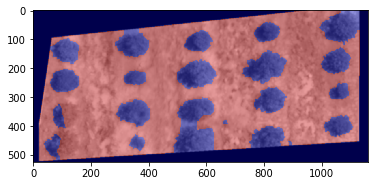

In [25]:
#the plot of the image re-labelled by the different coordinates of each is shown
plt.imshow(color.label2rgb(classified_labels, image=img))

In [26]:
from skimage.morphology import reconstruction

# Convert to float: Important for subtraction later which won't work with uint8
seed = np.copy(img)
seed[1:-1, 1:-1] = img.min()
mask = img

dilated = reconstruction(seed, mask, method='dilation')

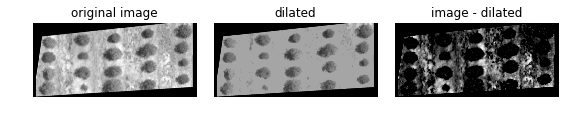

In [32]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1,
                                    ncols=3,
                                    figsize=(8, 2.5),
                                    sharex=True,
                                    sharey=True)

ax0.imshow(img, cmap='gray')
ax0.set_title('original image')
ax0.axis('off')

ax1.imshow(dilated, vmin=img.min(), vmax=img.max(), cmap='gray')
ax1.set_title('dilated')
ax1.axis('off')

ax2.imshow(img - dilated, cmap='gray')
ax2.set_title('image - dilated')
ax2.axis('off')

fig.tight_layout()